MovieWriter ffmpeg unavailable; using Pillow instead.


ValueError: unknown file extension: .mp4

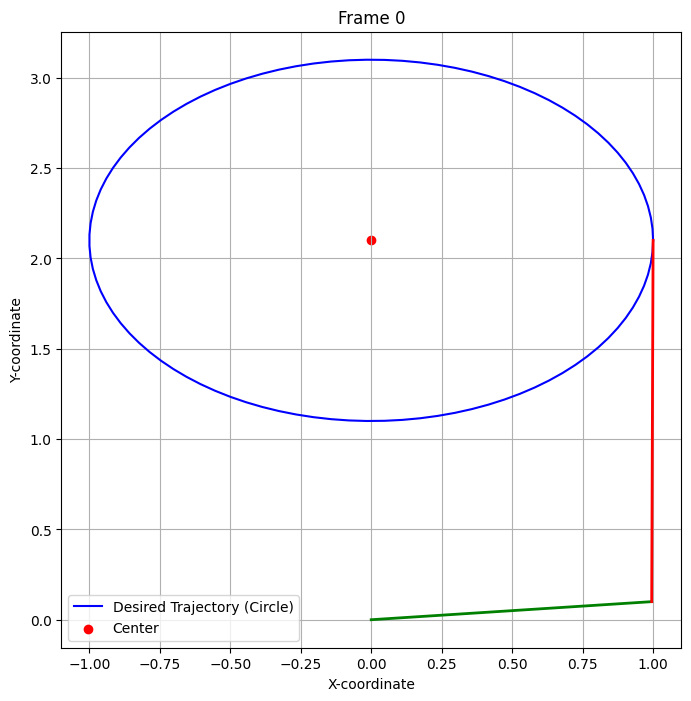

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import os
import matplotlib.animation as animation

# Function to perform inverse kinematics and calculate joint angles
def inverse_kinematics(x, y, l1, l2):
    D = (x**2 + y**2 - l1**2 - l2**2) / (2 * l1 * l2)
    D = np.clip(D, -1, 1)
    theta2 = np.arctan2(np.sqrt(max(0, 1 - D**2)), D)
    theta1 = np.arctan2(y, x) - np.arctan2(l2 * np.sin(theta2), l1 + l2 * np.cos(theta2))
    return theta1, theta2

# Define the parameters of the circular trajectory
center = (0, 2.1)
radius = 1

# Define the parameters of the robotic arm
l1 = 1
l2 = 2

# Define the time interval for simulation
t_start = 0
t_end = 2 * np.pi

# Define the time steps
num_steps = 100
t = np.linspace(t_start, t_end, num_steps)

# Calculate the X and Y coordinates of the circular trajectory
x_traj = center[0] + radius * np.cos(t)
y_traj = center[1] + radius * np.sin(t)

# Initialize arrays to store joint angles
theta1_traj = np.zeros_like(t)
theta2_traj = np.zeros_like(t)

# Perform inverse kinematics for each point on the trajectory
for i in range(num_steps):
    theta1_traj[i], theta2_traj[i] = inverse_kinematics(x_traj[i], y_traj[i], l1, l2)

# Create a directory to save images
if not os.path.exists("images"):
    os.makedirs("images")

# Plot and save each frame as a separate image
for i in range(num_steps):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_xlim(-2, 2)
    ax.set_ylim(0, 4)
    ax.set_aspect('equal')

    # Plot the circular trajectory
    ax.plot(x_traj, y_traj, label='Desired Trajectory (Circle)', color='blue')
    ax.scatter(center[0], center[1], color='red', marker='o', label='Center')

    # Plot the robotic arm movement
    x1 = l1 * np.cos(theta1_traj[i])
    y1 = l1 * np.sin(theta1_traj[i])
    x2 = x1 + l2 * np.cos(theta1_traj[i] + theta2_traj[i])
    y2 = y1 + l2 * np.sin(theta1_traj[i] + theta2_traj[i])
    ax.plot([0, x1], [0, y1], lw=2, color='green')
    ax.plot([x1, x2], [y1, y2], lw=2, color='red')

    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_title('Frame {}'.format(i))
    ax.legend()
    ax.grid(True)

    # Save the frame as an image
    filename = "images/frame_{:04d}.png".format(i)
    plt.savefig(filename)
    plt.close()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8, 8))

# Create the animation function
def animate(i):
    ax.clear()

    # Plot the circular trajectory
    ax.plot(x_traj, y_traj, label='Desired Trajectory (Circle)', color='blue')
    ax.scatter(center[0], center[1], color='red', marker='o', label='Center')

    # Plot the robotic arm movement
    x1 = l1 * np.cos(theta1_traj[i])
    y1 = l1 * np.sin(theta1_traj[i])
    x2 = x1 + l2 * np.cos(theta1_traj[i] + theta2_traj[i])
    y2 = y1 + l2 * np.sin(theta1_traj[i] + theta2_traj[i])
    ax.plot([0, x1], [0, y1], lw=2, color='green')
    ax.plot([x1, x2], [y1, y2], lw=2, color='red')

    ax.set_xlabel('X-coordinate')
    ax.set_ylabel('Y-coordinate')
    ax.set_title('Frame {}'.format(i))
    ax.legend()
    ax.grid(True)

# Create the animation
ani = FuncAnimation(fig, animate, frames=num_steps, repeat=False)

# Save the animation as an MP4 file
ani.save('robotic_arm_simulation.mp4', writer='ffmpeg', fps=30)

plt.show()
